# Instalar Tensorflow

In [1]:
# 2do paso: importe los siguientes módulos:

import pandas as pd
import numpy as np
import tensorflow_hub as hub
import tensorflow_text as text
from bs4 import BeautifulSoup # para trabajar texto en varios formatos
import re # expresiones regulares

#importar datos


In [2]:
df = pd.read_csv("SMSSpamCollection(Filtrada).csv", on_bad_lines='skip', sep=';')

In [3]:
df

,resultado,mensaje
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,ham,As per your request 'Melle Melle (Oru Minnamin...
3,spam,WINNER!! As a valued network customer you have...
4,spam,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,spam,Had your contract mobile 11 Mnths? Latest Moto...
1286,ham,Yeh. Indians was nice. Tho it did kane me off ...
1287,spam,REMINDER FROM O2: To get 2.50 pounds free call...
1288,spam,This is the 2nd time we have tried 2 contact u...


#Análisis exploratorio

In [4]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
#funcion resumen de un dataframe

def resumen(data):
  total_perdidos = data.isnull().sum().sum()
  missing_percent = data.isnull().sum()*100 /len(data)
  total_missing = data.isnull().sum()
  unique = data.nunique()
  not_null = data.notnull().sum()
  df = pd.DataFrame({
      'Valores Unicos' : unique,
      'Valores Existentes': not_null,
      'Total perdidos': total_missing,
      'Porc. perdidos %': missing_percent
  })
  tipos = data.dtypes
  numericas = tipos[tipos != object].index
  no_numericas = tipos[tipos == object].index
  print('1. Las dimensiones de la data:', data.shape)
  print('2. Total Datos perdidos son:', total_perdidos)
  print('3. La cantidad de variables numericas es: ', len(numericas), '\n   Y ellas son:\n', numericas)
  print('4. La cantidad de variables NO numericas es: ', len(no_numericas), '\n  Y ellas son:\n', no_numericas)
  df = df.round(2)
  return(df)

In [6]:
resumen(df)

1. Las dimensiones de la data: (1290, 2)
2. Total Datos perdidos son: 0
3. La cantidad de variables numericas es:  0 
   Y ellas son:
 Index([], dtype='object')
4. La cantidad de variables NO numericas es:  2 
  Y ellas son:
 Index(['resultado', 'mensaje'], dtype='object')


,Valores Unicos,Valores Existentes,Total perdidos,Porc. perdidos %
resultado,2,1290,0,0.0
mensaje,1148,1290,0,0.0


In [7]:
df.groupby('resultado').size()

resultado
ham     668
spam    622
dtype: int64

ham     668
spam    622
Name: resultado, dtype: int64


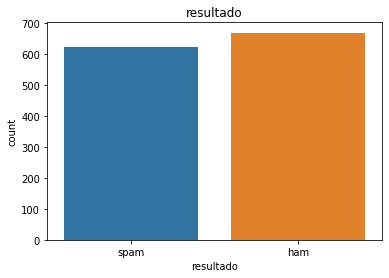

In [8]:
sns.countplot(df['resultado'])
print(df['resultado'].value_counts())
plt.title("resultado")
plt.show()

In [9]:
for i in df:
  print(i, len(df[i].unique()))

resultado 2
mensaje 1148


Debemos etiquetar a los textos convertidos a vectores

In [10]:
df['resultado']

0       spam
1       spam
2        ham
3       spam
4       spam
        ... 
1285    spam
1286     ham
1287    spam
1288    spam
1289     ham
Name: resultado, Length: 1290, dtype: object

#SECCION CON DATOS PROCESADOS

## Preprocesamiento de texto


In [11]:
df

,resultado,mensaje
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,ham,As per your request 'Melle Melle (Oru Minnamin...
3,spam,WINNER!! As a valued network customer you have...
4,spam,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,spam,Had your contract mobile 11 Mnths? Latest Moto...
1286,ham,Yeh. Indians was nice. Tho it did kane me off ...
1287,spam,REMINDER FROM O2: To get 2.50 pounds free call...
1288,spam,This is the 2nd time we have tried 2 contact u...


In [12]:
df['resultado'] = df['resultado'].apply(lambda x:1 if x == 'ham' else 0) 

In [13]:
df

,resultado,mensaje
0,0,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,FreeMsg Hey there darling it's been 3 week's n...
2,1,As per your request 'Melle Melle (Oru Minnamin...
3,0,WINNER!! As a valued network customer you have...
4,0,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,0,Had your contract mobile 11 Mnths? Latest Moto...
1286,1,Yeh. Indians was nice. Tho it did kane me off ...
1287,0,REMINDER FROM O2: To get 2.50 pounds free call...
1288,0,This is the 2nd time we have tried 2 contact u...


## Limpieza de datos

In [14]:
# El código anterior me trae la última versión de keras
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import tensorflow as tf

from tensorflow.keras import layers # importar layers desde keras

import tensorflow_datasets as tfds # este me trae los tokens

In [15]:
def clean_tweet(tweet):

  tweet= BeautifulSoup(tweet,"lxml").get_text() # sirve para trabajar en un formato especial de tratar el texto. hay que usar el get_text para que me lo devuela en un formato legible
  
  # Dejamos todo en minúscula
  tweet = tweet.lower()
  # Reemplazamos puntos por espacios
  tweet = tweet.replace("."," ")
  # Eliminamos la @ y su mención
  tweet = re.sub(r"@[A-Za-z0-9.]+",' ',tweet) # después del @ puede leer lo que se encuentra en el []. El + significa. El r significa raw o string
  # Eliminamos los links de la URLs
  tweet = re.sub(r"https?://[A-Za-z0-9./]+",' ', tweet) # aqui el ? me dice que el caracter anterior puede estar o no
  # Nos quedamos solo con los caracteres
  tweet = re.sub(r"[^a-zA-Z.!?']",' ',tweet)# cualquier cosa que no sea lo que viene después de ^ se va a sustituir por espacios en blanco
  # Eliminamos los sitios web
  tweet = re.sub(r"www[A-Za-z0-9./]+",' ', tweet)
  # Eliminamos espacios en blanco adicionales
  tweet = re.sub(r" +",' ',tweet)# si existe más de un espacio en blanco lo reemplazamos por uno solo. El más me dice eso, si hay más de uno reemplazo
  return tweet

In [16]:
df_clean = [clean_tweet(tweet) for tweet in df.mensaje] # esto me queda en una lista guardado

# Embedding small bert mas Sencillo 128 vectores
https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2

## transformar texto (Embedding)

In [17]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2")

2022-09-07 02:02:14.386583: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-07 02:02:14.386652: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2022-09-07 02:02:14.387027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df_clean) # df_clean es el texto

In [19]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [20]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 128), dtype=float32, numpy=
array([[-0.999942  , -0.00141432, -0.9810854 , ...,  0.98082685,
         0.98178196,  0.96391606],
       [-0.9991202 ,  0.05296545, -0.98559695, ...,  0.9239925 ,
         0.9558225 ,  0.9984839 ],
       [-0.99986243,  0.03978845, -0.9731644 , ...,  0.73242617,
         0.97078604,  0.9766909 ],
       ...,
       [-0.99998385,  0.03318283, -0.99550444, ...,  0.95926076,
         0.9974625 ,  0.964273  ],
       [-0.9999856 ,  0.12238986, -0.9896998 , ...,  0.98565155,
         0.96824807,  0.9937904 ],
       [-0.9996448 ,  0.09184259, -0.9976636 , ...,  0.90646094,
         0.9652779 ,  0.9989037 ]], dtype=float32)>

In [21]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [22]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 128)

In [23]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.999942,-0.001414,-0.981085,-0.484473,-0.948341,0.171350,-0.981562,-0.706304,-0.006808,-0.095359,...,0.128026,-0.990112,0.187941,-0.998624,-0.819512,0.877467,-0.999149,0.980827,0.981782,0.963916
1,-0.999120,0.052965,-0.985597,0.318218,-0.978574,-0.563376,-0.998118,0.185895,0.121993,0.005437,...,0.155417,-0.251321,0.236179,-0.999170,-0.642842,0.981704,-0.992995,0.923993,0.955823,0.998484
2,-0.999862,0.039788,-0.973164,0.168508,-0.969527,-0.213720,-0.988347,-0.972103,-0.031048,-0.025507,...,0.133916,-0.986624,0.169207,-0.999534,-0.628558,0.798255,-0.977197,0.732426,0.970786,0.976691
3,-0.999984,0.044671,-0.993844,0.591809,-0.880615,0.781171,-0.973504,-0.696313,0.135529,-0.005958,...,0.142242,-0.995556,0.196146,-0.998720,-0.586202,0.946417,-0.997387,0.998785,0.998541,0.884596
4,-0.999940,0.095895,-0.997162,-0.121784,-0.996297,0.846379,-0.994946,0.436924,0.035794,-0.006821,...,0.215716,-0.989526,0.178496,-0.999673,-0.879214,0.881079,-0.998047,0.986704,0.997149,0.974610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-0.999978,0.044769,-0.996063,0.206673,-0.993597,0.577214,-0.994746,0.505085,0.094988,0.063025,...,0.203866,-0.998053,0.137735,-0.999817,-0.956234,0.923886,-0.996958,0.989620,0.994490,0.967436
1286,-0.999188,0.034496,-0.990960,0.951374,-0.999831,-0.388626,-0.997586,0.758842,0.070556,0.052468,...,0.134165,-0.782383,0.201555,-0.999390,-0.920580,0.792196,-0.945352,0.811551,0.946749,0.997387
1287,-0.999984,0.033183,-0.995504,0.454196,-0.921501,-0.103736,-0.989906,-0.962311,-0.030409,-0.049869,...,0.104561,-0.996887,0.170619,-0.999599,-0.375127,0.962274,-0.997076,0.959261,0.997463,0.964273
1288,-0.999986,0.122390,-0.989700,0.519770,-0.975490,0.565476,-0.979562,-0.951744,0.093162,-0.001901,...,0.189051,-0.991586,0.195924,-0.999426,-0.709937,0.916501,-0.998173,0.985652,0.968248,0.993790


##seleccion de las variable

In [24]:
X = dataX2 
Y = df['resultado'].copy()

In [25]:
X.columns

RangeIndex(start=0, stop=128, step=1)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 128 entries, 0 to 127
dtypes: float32(128)
memory usage: 645.1 KB


In [27]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

## Balanceo de datos

## Aplicando Smote

In [28]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

## Train y test

In [29]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

## SVM


###SVC 

#### Caso 1

In [30]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [31]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [32]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 2, 'gamma': 1, 'kernel': 'linear'}


In [33]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       212
           1       0.93      0.92      0.92       189

    accuracy                           0.93       401
   macro avg       0.93      0.92      0.92       401
weighted avg       0.93      0.93      0.93       401



Matriz de Confusión
[[198  14]
 [ 16 173]]


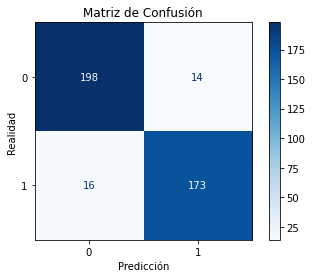

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

### Nusvm

### Caso 1

In [36]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [37]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [38]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}


In [39]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       212
           1       0.95      0.93      0.94       189

    accuracy                           0.94       401
   macro avg       0.94      0.94      0.94       401
weighted avg       0.94      0.94      0.94       401



Matriz de Confusión
[[202  10]
 [ 13 176]]


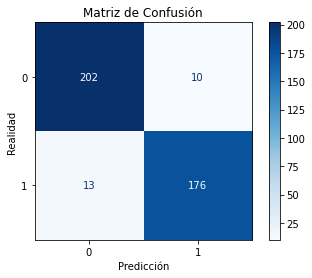

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

##SECCION CON DATOS SIN PREPROCESAR

## transformar texto(Embeding) Sin preprocesamiento de texto

In [42]:
df

,resultado,mensaje
0,0,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,FreeMsg Hey there darling it's been 3 week's n...
2,1,As per your request 'Melle Melle (Oru Minnamin...
3,0,WINNER!! As a valued network customer you have...
4,0,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,0,Had your contract mobile 11 Mnths? Latest Moto...
1286,1,Yeh. Indians was nice. Tho it did kane me off ...
1287,0,REMINDER FROM O2: To get 2.50 pounds free call...
1288,0,This is the 2nd time we have tried 2 contact u...


In [43]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2")

In [44]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df['mensaje']) # df['mensaje'] es el texto

In [45]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [46]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 128), dtype=float32, numpy=
array([[-0.9999836 ,  0.01233948, -0.97867   , ...,  0.973742  ,
         0.8694874 ,  0.92939764],
       [-0.99979466,  0.05645132, -0.9942094 , ...,  0.8997836 ,
         0.8589003 ,  0.99508   ],
       [-0.99994373,  0.02813301, -0.9845494 , ...,  0.7336781 ,
         0.9590306 ,  0.9695843 ],
       ...,
       [-0.99999374,  0.0523458 , -0.9969019 , ...,  0.97015846,
         0.99530405,  0.937511  ],
       [-0.9999974 ,  0.08623964, -0.9962204 , ...,  0.9832027 ,
         0.6856059 ,  0.94771725],
       [-0.9996448 ,  0.09184259, -0.9976636 , ...,  0.90646094,
         0.9652779 ,  0.9989037 ]], dtype=float32)>

In [47]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [48]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 128)

In [49]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.999984,0.012339,-0.978670,-0.390501,-0.916917,0.785426,-0.960855,-0.899993,-0.026774,0.006909,...,0.102973,-0.997656,0.131492,-0.999817,-0.885076,0.849013,-0.998878,0.973742,0.869487,0.929398
1,-0.999795,0.056451,-0.994209,0.063637,-0.976721,-0.259604,-0.996063,0.210839,0.120435,0.046410,...,0.136751,-0.518643,0.198305,-0.999841,-0.667421,0.978685,-0.995415,0.899784,0.858900,0.995080
2,-0.999944,0.028133,-0.984549,0.188969,-0.981058,-0.075677,-0.987081,-0.971607,-0.040403,-0.020766,...,0.121796,-0.987217,0.160352,-0.999855,-0.689945,0.858107,-0.990487,0.733678,0.959031,0.969584
3,-0.999998,0.087004,-0.998042,0.028922,-0.895981,0.884447,-0.944886,-0.877754,0.108473,0.004284,...,0.142328,-0.998706,0.098014,-0.999967,-0.565350,0.954452,-0.998851,0.997118,0.963491,0.777209
4,-0.999968,0.092309,-0.991751,-0.398493,-0.989488,0.908049,-0.992710,0.105460,0.048611,-0.012153,...,0.218415,-0.997700,0.167798,-0.999842,-0.863140,0.947459,-0.997234,0.991300,0.993118,0.958039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-0.999991,0.060197,-0.999659,0.075845,-0.996350,0.716204,-0.992615,0.528149,0.107021,-0.010136,...,0.220872,-0.996582,0.114361,-0.999985,-0.912078,0.941813,-0.999059,0.975390,0.980778,0.920063
1286,-0.999953,0.030791,-0.999822,0.927945,-0.999750,-0.179566,-0.987749,0.726748,0.090772,0.035918,...,0.108623,-0.716046,0.121274,-0.999976,-0.861851,0.668276,-0.994187,0.888636,0.890242,0.972008
1287,-0.999994,0.052346,-0.996902,0.245643,-0.920715,0.041507,-0.978795,-0.972810,-0.000674,-0.063252,...,0.127478,-0.997758,0.113584,-0.999896,-0.482480,0.967473,-0.997917,0.970158,0.995304,0.937511
1288,-0.999997,0.086240,-0.996220,0.014216,-0.955859,0.794546,-0.974418,-0.943467,0.073484,0.030729,...,0.147318,-0.997681,0.099959,-0.999968,-0.603682,0.850176,-0.999193,0.983203,0.685606,0.947717


##seleccion de las variable

In [50]:
X = dataX2 
Y = df['resultado'].copy()

In [51]:
X.columns

RangeIndex(start=0, stop=128, step=1)

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 128 entries, 0 to 127
dtypes: float32(128)
memory usage: 645.1 KB


In [53]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

## Balanceo de datos

### Aplicando Smote

In [54]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

## Train y test

In [55]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

## SVM


###SVC 

#### Caso 1

In [56]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [57]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [58]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [59]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       212
           1       0.96      0.95      0.95       189

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401



Matriz de Confusión
[[204   8]
 [  9 180]]


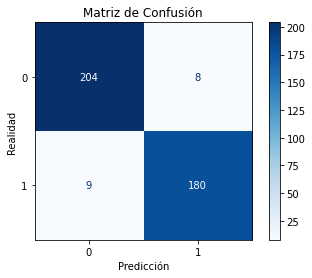

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

### Nusvm

#### Caso 1

In [62]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [63]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [64]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}


In [65]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [66]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       212
           1       0.93      0.97      0.95       189

    accuracy                           0.95       401
   macro avg       0.95      0.95      0.95       401
weighted avg       0.95      0.95      0.95       401



Matriz de Confusión
[[199  13]
 [  6 183]]


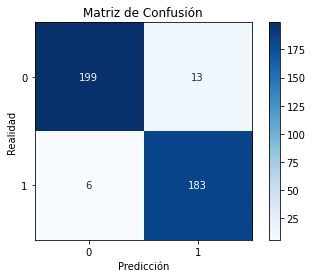

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

# Embedding small bert complejo 768 vectores
https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/2

## transformar texto (Embedding)

In [68]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/2")

In [69]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df_clean) # df_clean es el texto

In [70]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [71]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 768), dtype=float32, numpy=
array([[ 0.03142604,  0.8037415 , -0.06045146, ...,  0.14879657,
         0.0058126 , -0.998533  ],
       [ 0.05226115,  0.4624548 , -0.41974244, ...,  0.5245022 ,
        -0.23198171,  0.99999803],
       [ 0.22917731,  0.2827687 , -0.54071164, ...,  0.44585466,
        -0.2164088 , -0.99955225],
       ...,
       [ 0.07305684,  0.7566186 , -0.04378816, ..., -0.0398397 ,
         0.07749697, -0.7123792 ],
       [ 0.1513717 ,  0.4981787 , -0.36236888, ...,  0.50995904,
        -0.18760188, -0.99307853],
       [ 0.15411788, -0.8084427 , -0.29440075, ...,  0.2187708 ,
        -0.35820514, -0.6788743 ]], dtype=float32)>

In [72]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [73]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 768)

In [74]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.031426,0.803742,-0.060451,0.085933,0.985856,-0.188243,0.168137,0.097916,0.296175,-0.890946,...,-0.985810,0.060356,0.041755,0.989458,0.208446,0.352190,-0.034203,0.148797,0.005813,-0.998533
1,0.052261,0.462455,-0.419742,0.093994,0.997178,-0.288562,0.170065,0.354955,0.184094,-0.990233,...,0.460554,0.172707,-0.099823,-0.999710,0.451631,0.155042,-0.124340,0.524502,-0.231982,0.999998
2,0.229177,0.282769,-0.540712,-0.007794,0.920015,-0.110998,0.605113,0.482212,0.654565,-0.963235,...,-0.845900,0.000862,0.192655,0.996981,0.353406,0.285628,0.296523,0.445855,-0.216409,-0.999552
3,0.420007,0.026630,-0.210732,-0.027072,0.992289,-0.562200,0.321469,0.496387,0.418790,-0.942356,...,-0.938178,0.030644,0.218963,0.933007,0.332955,0.365656,0.381858,0.531592,-0.393467,-0.981154
4,0.083168,-0.231725,-0.132480,0.285737,0.968922,-0.142703,0.227571,0.038063,0.172309,-0.914819,...,-0.958747,0.047542,-0.221399,0.999014,0.078904,0.155455,-0.099148,0.277177,0.119123,-0.999946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,0.035067,0.529082,-0.261549,0.088913,0.997305,-0.412030,0.049513,0.322416,0.288380,-0.957339,...,-0.479231,0.203385,-0.175347,0.738624,0.330249,0.194519,0.125021,0.330579,-0.137782,-0.855340
1286,0.271497,-0.445038,-0.110126,-0.036539,0.906519,-0.032739,-0.212000,0.107343,-0.053609,-0.965833,...,-0.886332,0.086326,0.084698,0.940775,-0.002864,0.300278,-0.167341,0.249715,-0.327048,-0.953944
1287,0.073057,0.756619,-0.043788,0.234995,0.984583,-0.138720,0.146861,0.129115,0.364067,-0.972439,...,-0.837814,-0.089423,-0.148465,0.603967,-0.109776,-0.093587,-0.046851,-0.039840,0.077497,-0.712379
1288,0.151372,0.498179,-0.362369,0.040028,0.983191,-0.257190,0.298025,0.455524,0.561100,-0.956716,...,-0.971784,-0.005845,0.057366,0.986482,0.241709,0.151140,0.274757,0.509959,-0.187602,-0.993079


##seleccion de las variable

In [75]:
X = dataX2 
Y = df['resultado'].copy()

In [76]:
X.columns

RangeIndex(start=0, stop=768, step=1)

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 768 entries, 0 to 767
dtypes: float32(768)
memory usage: 3.8 MB


In [78]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

## Balanceo de datos

## Aplicando Smote

In [79]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

## Train y test

In [80]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

## SVM


###SVC 

#### Caso 1

In [81]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [82]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [83]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [84]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       212
           1       0.94      0.98      0.96       189

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401



Matriz de Confusión
[[201  11]
 [  4 185]]


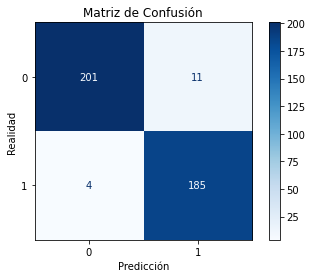

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

### Nusvm

#### Caso 1

In [87]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [88]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [89]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.1}


In [90]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [91]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       212
           1       0.96      0.97      0.97       189

    accuracy                           0.97       401
   macro avg       0.97      0.97      0.97       401
weighted avg       0.97      0.97      0.97       401



Matriz de Confusión
[[204   8]
 [  5 184]]


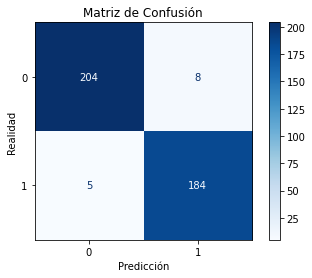

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

##SECCION CON DATOS SIN PREPROCESAR

## transformar texto(Embeding) Sin preprocesamiento de texto

In [93]:
df

,resultado,mensaje
0,0,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,FreeMsg Hey there darling it's been 3 week's n...
2,1,As per your request 'Melle Melle (Oru Minnamin...
3,0,WINNER!! As a valued network customer you have...
4,0,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,0,Had your contract mobile 11 Mnths? Latest Moto...
1286,1,Yeh. Indians was nice. Tho it did kane me off ...
1287,0,REMINDER FROM O2: To get 2.50 pounds free call...
1288,0,This is the 2nd time we have tried 2 contact u...


In [94]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/2")

In [95]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df['mensaje']) # df['mensaje'] es el texto

In [96]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [97]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 768), dtype=float32, numpy=
array([[ 0.08871425,  0.67912555, -0.16463964, ...,  0.1644198 ,
        -0.11735693, -0.987491  ],
       [ 0.1212618 ,  0.3194409 , -0.40186912, ...,  0.4667165 ,
        -0.28611186,  0.9996754 ],
       [ 0.19764955,  0.32201082, -0.616137  , ...,  0.47346365,
        -0.08850101, -0.99978775],
       ...,
       [ 0.13317777,  0.69238913, -0.05015263, ...,  0.04529166,
        -0.06035437, -0.42771077],
       [ 0.18150668, -0.05990547, -0.4888495 , ...,  0.61826706,
        -0.4013028 , -0.9999922 ],
       [ 0.15411788, -0.8084427 , -0.29440075, ...,  0.2187708 ,
        -0.35820514, -0.6788743 ]], dtype=float32)>

In [98]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [99]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 768)

In [100]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.088714,0.679126,-0.164640,0.014652,0.989995,-0.287194,0.128881,0.269601,0.406100,-0.901636,...,-0.961371,0.037564,0.361678,0.955746,0.250704,0.322893,0.095721,0.164420,-0.117357,-0.987491
1,0.121262,0.319441,-0.401869,-0.040149,0.996549,-0.278394,0.207220,0.256279,0.205172,-0.971728,...,-0.410684,0.040421,-0.024683,-0.993681,0.400094,0.166909,-0.159388,0.466716,-0.286112,0.999675
2,0.197650,0.322011,-0.616137,-0.082851,0.953918,-0.033996,0.615772,0.520698,0.759945,-0.959604,...,-0.710772,-0.084104,0.134832,0.997635,0.371444,0.343629,0.339780,0.473464,-0.088501,-0.999788
3,0.391307,-0.509089,-0.151889,-0.104724,0.966555,-0.284739,0.340006,0.409245,0.467653,-0.848932,...,-0.976630,0.026175,0.351392,0.999708,0.262009,0.445389,0.229833,0.596833,-0.380778,-0.999994
4,0.013746,0.326090,-0.333164,0.074524,0.996711,-0.118981,0.403797,0.300551,0.350966,-0.981943,...,-0.021768,0.228136,-0.235478,-0.986360,0.207861,0.205549,0.088095,0.196613,-0.128481,0.997867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,0.004048,0.044948,-0.239052,0.157082,0.992442,-0.330080,0.112964,0.313799,0.302498,-0.951736,...,-0.885518,0.071003,-0.120074,0.998683,0.320988,0.120938,0.099327,0.426714,-0.013189,-0.999943
1286,-0.013918,-0.260331,-0.369983,-0.209300,0.884095,-0.155285,-0.056112,0.343705,0.277783,-0.980170,...,-0.885004,0.065726,0.355587,0.998712,0.182542,0.417968,0.111855,0.433144,-0.478042,-0.999920
1287,0.133178,0.692389,-0.050153,0.145355,0.988687,-0.201207,0.122350,0.139860,0.381572,-0.974084,...,-0.872812,0.016867,-0.019217,0.353452,-0.050673,0.000810,-0.030031,0.045292,-0.060354,-0.427711
1288,0.181507,-0.059905,-0.488849,-0.174354,0.935618,-0.461734,0.342809,0.451812,0.632596,-0.974781,...,-0.983631,-0.167708,0.557624,0.999695,0.482742,0.424970,0.320369,0.618267,-0.401303,-0.999992


##seleccion de las variable

In [101]:
X = dataX2 
Y = df['resultado'].copy()

In [102]:
X.columns

RangeIndex(start=0, stop=768, step=1)

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 768 entries, 0 to 767
dtypes: float32(768)
memory usage: 3.8 MB


In [104]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

## Balanceo de datos

### Aplicando Smote

In [105]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

## Train y test

In [106]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

## SVM


###SVC 

#### Caso 1

In [107]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [108]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [109]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [110]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       212
           1       0.96      0.99      0.98       189

    accuracy                           0.98       401
   macro avg       0.98      0.98      0.98       401
weighted avg       0.98      0.98      0.98       401



Matriz de Confusión
[[205   7]
 [  1 188]]


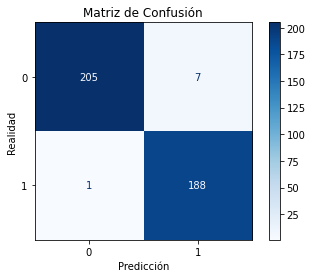

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

### Nusvm

#### Caso 1

In [113]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [114]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [115]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'auto', 'kernel': 'sigmoid', 'nu': 0.1}


In [116]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [117]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       212
           1       0.96      0.99      0.98       189

    accuracy                           0.98       401
   macro avg       0.98      0.98      0.98       401
weighted avg       0.98      0.98      0.98       401



Matriz de Confusión
[[205   7]
 [  2 187]]


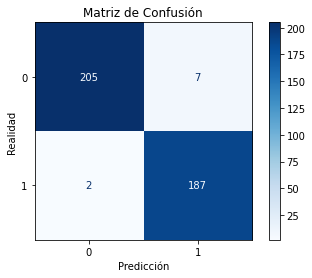

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

# Embedding  bert normal L-12 --- 768 Vectores
https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4

## transformar texto (Embedding)

In [119]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [120]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df_clean) # df_clean es el texto

In [121]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [122]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 768), dtype=float32, numpy=
array([[-0.75730956, -0.42505357, -0.7350513 , ..., -0.5764751 ,
        -0.655075  ,  0.7657074 ],
       [-0.7651781 , -0.4213607 , -0.75798196, ..., -0.27572042,
        -0.65562266,  0.83420044],
       [-0.81173605, -0.531464  , -0.9737113 , ..., -0.92622936,
        -0.6807842 ,  0.72695416],
       ...,
       [-0.8050632 , -0.56816167, -0.8823565 , ..., -0.6575462 ,
        -0.69617844,  0.8332591 ],
       [-0.7697152 , -0.38749805, -0.40023124, ..., -0.18508947,
        -0.62858975,  0.8490988 ],
       [-0.84208393, -0.5069599 , -0.7763376 , ..., -0.85260934,
        -0.6869661 ,  0.92257196]], dtype=float32)>

In [123]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [124]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 768)

In [125]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.757310,-0.425054,-0.735051,0.616823,0.434431,-0.207697,0.722834,0.298271,-0.418425,-0.999970,...,0.541846,0.139681,0.815318,0.755486,-0.131656,0.087501,0.708868,-0.576475,-0.655075,0.765707
1,-0.765178,-0.421361,-0.757982,0.579527,0.410910,-0.123458,0.692512,0.310883,-0.479182,-0.999967,...,0.549559,0.117115,0.866232,0.798901,0.440707,0.365194,0.646461,-0.275720,-0.655623,0.834200
2,-0.811736,-0.531464,-0.973711,0.790537,0.854787,-0.311390,0.719173,0.285851,-0.769165,-0.999993,...,0.598200,-0.503647,0.956874,0.785168,-0.326721,-0.147038,0.649085,-0.926229,-0.680784,0.726954
3,-0.849474,-0.470662,-0.795166,0.656917,0.476046,-0.153718,0.822621,0.245486,-0.578682,-0.999985,...,0.485121,0.068865,0.848601,0.820875,0.061161,-0.005170,0.579785,-0.697040,-0.637968,0.819345
4,-0.827662,-0.556465,-0.925901,0.782784,0.698466,-0.265253,0.797253,0.392149,-0.764461,-0.999985,...,0.515834,0.040695,0.958262,0.837710,0.049949,0.083915,0.633500,-0.787124,-0.752586,0.872425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-0.755280,-0.555400,-0.922314,0.712132,0.652668,-0.296853,0.643542,0.431018,-0.601828,-0.999972,...,0.378174,-0.052208,0.930524,0.763092,-0.229372,0.050177,0.523758,-0.843485,-0.679903,0.781227
1286,-0.763205,-0.256878,0.025879,0.329793,0.134540,-0.002173,0.487883,0.083764,0.370077,-0.999833,...,0.510022,0.185481,0.539482,0.803911,0.372977,0.817105,0.567112,0.151515,-0.515829,0.853345
1287,-0.805063,-0.568162,-0.882357,0.726839,0.638819,-0.290169,0.819806,0.381533,-0.688665,-0.999989,...,0.502742,0.018432,0.964897,0.822294,0.215436,0.085814,0.596353,-0.657546,-0.696178,0.833259
1288,-0.769715,-0.387498,-0.400231,0.528499,0.024473,-0.038274,0.778287,0.242336,0.023429,-0.999975,...,0.474402,0.449035,0.629827,0.838736,0.366824,0.439793,0.547664,-0.185089,-0.628590,0.849099


##seleccion de las variable

In [126]:
X = dataX2 
Y = df['resultado'].copy()

In [127]:
X.columns

RangeIndex(start=0, stop=768, step=1)

In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 768 entries, 0 to 767
dtypes: float32(768)
memory usage: 3.8 MB


In [129]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

## Balanceo de datos

## Aplicando Smote

In [130]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

## Train y test

In [131]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

## SVM


###SVC 

#### Caso 1

In [132]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [133]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [134]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 4, 'gamma': 1, 'kernel': 'linear'}


In [135]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [136]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       212
           1       0.95      0.95      0.95       189

    accuracy                           0.95       401
   macro avg       0.95      0.95      0.95       401
weighted avg       0.95      0.95      0.95       401



Matriz de Confusión
[[203   9]
 [ 10 179]]


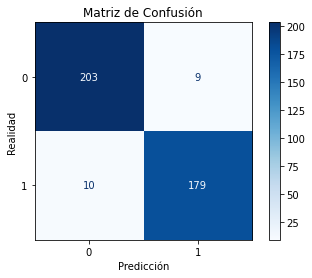

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

### Nusvm

### Caso 1

In [138]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [139]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [140]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.1}


In [141]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [142]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       212
           1       0.95      0.96      0.96       189

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401



Matriz de Confusión
[[202  10]
 [  7 182]]


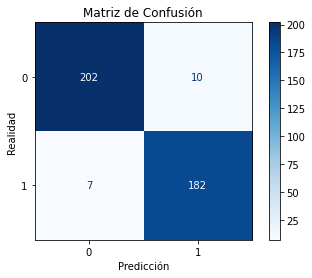

In [143]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

##SECCION CON DATOS SIN PREPROCESAR

## transformar texto(Embeding) Sin preprocesamiento de texto

In [144]:
df

,resultado,mensaje
0,0,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,FreeMsg Hey there darling it's been 3 week's n...
2,1,As per your request 'Melle Melle (Oru Minnamin...
3,0,WINNER!! As a valued network customer you have...
4,0,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,0,Had your contract mobile 11 Mnths? Latest Moto...
1286,1,Yeh. Indians was nice. Tho it did kane me off ...
1287,0,REMINDER FROM O2: To get 2.50 pounds free call...
1288,0,This is the 2nd time we have tried 2 contact u...


In [145]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [146]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df['mensaje']) # df['mensaje'] es el texto

In [147]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [148]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 768), dtype=float32, numpy=
array([[-0.70380414, -0.50275   , -0.96400726, ..., -0.910996  ,
        -0.5792531 ,  0.60989   ],
       [-0.72199935, -0.40060842, -0.8154598 , ..., -0.37021047,
        -0.6039013 ,  0.8262387 ],
       [-0.7603904 , -0.5884671 , -0.98880243, ..., -0.95756686,
        -0.7282411 ,  0.70222956],
       ...,
       [-0.74105465, -0.46842217, -0.7224001 , ..., -0.38898322,
        -0.60638297,  0.80440664],
       [-0.5536015 , -0.2666968 , -0.75222147, ..., -0.6513219 ,
        -0.48442695,  0.6873135 ],
       [-0.84208393, -0.5069599 , -0.7763376 , ..., -0.85260934,
        -0.6869661 ,  0.92257196]], dtype=float32)>

In [149]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [150]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 768)

In [151]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.703804,-0.502750,-0.964007,0.635666,0.814911,-0.210602,0.566293,0.227010,-0.783770,-0.999962,...,0.515952,-0.395139,0.972245,0.691058,-0.378460,-0.258926,0.651631,-0.910996,-0.579253,0.609890
1,-0.721999,-0.400608,-0.815460,0.564368,0.408997,-0.108388,0.697040,0.274073,-0.490181,-0.999963,...,0.519105,0.300468,0.870646,0.790926,0.483784,0.305214,0.618006,-0.370210,-0.603901,0.826239
2,-0.760390,-0.588467,-0.988802,0.788419,0.902556,-0.397836,0.613838,0.355444,-0.893838,-0.999994,...,0.694200,-0.653235,0.983411,0.724643,-0.357922,-0.291343,0.750080,-0.957567,-0.728241,0.702230
3,-0.692767,-0.474694,-0.967749,0.652573,0.817786,-0.136169,0.523782,0.119574,-0.872450,-0.999958,...,0.589285,0.131805,0.974837,0.610474,-0.021977,-0.368047,0.684521,-0.955397,-0.482647,0.688380
4,-0.748453,-0.537846,-0.881682,0.672674,0.594302,-0.199079,0.641875,0.390914,-0.624959,-0.999971,...,0.478907,0.026840,0.909465,0.767211,0.120146,0.156654,0.577673,-0.711902,-0.710808,0.784341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-0.686685,-0.416652,-0.897436,0.660913,0.656108,-0.123597,0.497502,0.257550,-0.602215,-0.999903,...,0.431256,0.308306,0.916705,0.675961,-0.067445,0.063498,0.524421,-0.853447,-0.570220,0.737170
1286,-0.655133,-0.244736,-0.726327,0.361169,0.528822,0.077803,0.317611,0.062812,-0.395109,-0.999873,...,0.655909,-0.329811,0.917422,0.727615,-0.298853,0.554949,0.697899,-0.410967,-0.527422,0.763145
1287,-0.741055,-0.468422,-0.722400,0.574277,0.445859,-0.140905,0.675038,0.286838,-0.395922,-0.999978,...,0.455880,0.366724,0.888101,0.773686,0.411397,0.319295,0.525459,-0.388983,-0.606383,0.804407
1288,-0.553602,-0.266697,-0.752221,0.433210,0.325693,0.001156,0.374882,0.042260,-0.264301,-0.999762,...,0.540520,0.577038,0.686959,0.672086,0.346009,0.228041,0.637448,-0.651322,-0.484427,0.687313


##seleccion de las variable

In [152]:
X = dataX2 
Y = df['resultado'].copy()

In [153]:
X.columns

RangeIndex(start=0, stop=768, step=1)

In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 768 entries, 0 to 767
dtypes: float32(768)
memory usage: 3.8 MB


In [155]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

## Balanceo de datos

### Aplicando Smote

In [156]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

## Train y test

In [157]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

## SVM


###SVC 

#### Caso 1

In [158]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [159]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [160]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [161]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [162]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       212
           1       0.95      0.99      0.97       189

    accuracy                           0.98       401
   macro avg       0.97      0.98      0.98       401
weighted avg       0.98      0.98      0.98       401



Matriz de Confusión
[[203   9]
 [  1 188]]


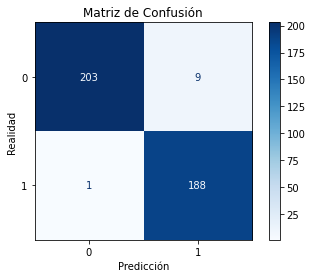

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

### Nusvm

#### Caso 1

In [164]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [165]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [166]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'scale', 'kernel': 'linear', 'nu': 0.1}


In [167]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [168]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       212
           1       0.96      0.97      0.96       189

    accuracy                           0.97       401
   macro avg       0.96      0.97      0.96       401
weighted avg       0.97      0.97      0.97       401



Matriz de Confusión
[[204   8]
 [  6 183]]


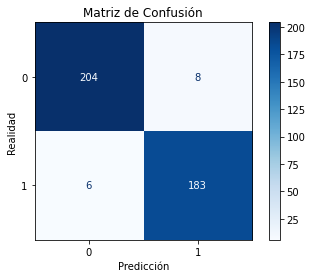

In [169]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

# Embedding  bert normal L-24 --- 1024
https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/4

## transformar texto (Embedding)

In [221]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/4")

In [222]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df_clean) # df_clean es el texto

In [223]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [224]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 1024), dtype=float32, numpy=
array([[-0.99949956, -0.99085975,  0.9998391 , ..., -0.9609667 ,
         0.9828136 , -0.94329846],
       [-0.9589646 , -0.8529227 ,  0.9996363 , ..., -0.98234016,
         0.9320804 , -0.9352594 ],
       [-0.99829775, -0.99360347,  0.99999636, ..., -0.9987169 ,
         0.97705257, -0.9866522 ],
       ...,
       [-0.9979986 , -0.9795863 ,  0.9998525 , ..., -0.99126667,
         0.95733964, -0.95671636],
       [-0.99923575, -0.9851741 ,  0.9999988 , ..., -0.9995034 ,
         0.9953244 , -0.99103177],
       [ 0.75697905, -0.16161178,  0.9103952 , ..., -0.9734895 ,
         0.62785506, -0.81368935]], dtype=float32)>

In [225]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [226]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 1024)

In [227]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.999500,-0.990860,0.999839,-0.855886,-0.991808,0.992222,-0.994173,0.987626,0.917412,-0.994689,...,-0.438021,-0.845629,-0.833390,0.997219,0.999974,-0.827480,0.988352,-0.960967,0.982814,-0.943298
1,-0.958965,-0.852923,0.999636,-0.945421,-0.997638,0.769888,-0.996709,0.994466,0.964754,-0.991286,...,-0.917088,-0.965253,-0.810747,0.978622,0.999144,-0.867613,0.993289,-0.982340,0.932080,-0.935259
2,-0.998298,-0.993603,0.999996,-0.969279,-0.999621,0.961838,-0.999550,0.999169,0.987666,-0.999605,...,-0.985060,-0.884945,-0.457453,0.997638,0.999996,-0.691892,0.998706,-0.998717,0.977053,-0.986652
3,-0.916665,-0.910133,0.999751,-0.974598,-0.999014,0.575932,-0.998432,0.998656,0.962508,-0.996881,...,-0.987680,-0.889339,-0.721946,0.965732,0.999860,-0.764152,0.994829,-0.995405,0.890138,-0.972894
4,-0.999490,-0.995659,0.999963,-0.942301,-0.998035,0.990083,-0.998430,0.997497,0.959646,-0.998030,...,-0.947338,-0.398675,-0.291013,0.998072,0.999998,-0.268177,0.995851,-0.997214,0.985034,-0.971948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-0.997337,-0.981613,0.999874,-0.919656,-0.996679,0.969723,-0.996067,0.996106,0.948286,-0.995641,...,-0.881886,-0.880315,-0.781047,0.993618,0.999926,-0.792438,0.993823,-0.989936,0.963670,-0.959143
1286,-0.999321,-0.986594,0.999943,-0.965776,-0.995654,0.984449,-0.998527,0.995016,0.966982,-0.995223,...,-0.822023,-0.883891,-0.685010,0.996787,0.999989,-0.765586,0.996877,-0.995015,0.993574,-0.953915
1287,-0.997999,-0.979586,0.999852,-0.890793,-0.997096,0.967286,-0.996300,0.993193,0.946467,-0.994302,...,-0.875531,-0.904678,-0.788686,0.993258,0.999948,-0.799036,0.995409,-0.991267,0.957340,-0.956716
1288,-0.999236,-0.985174,0.999999,-0.995293,-0.999675,0.969522,-0.999755,0.999808,0.994743,-0.999539,...,-0.988791,-0.959261,-0.629232,0.997872,0.999999,-0.623725,0.999422,-0.999503,0.995324,-0.991032


##seleccion de las variable

In [228]:
X = dataX2 
Y = df['resultado'].copy()

In [229]:
X.columns

RangeIndex(start=0, stop=1024, step=1)

In [230]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 1024 entries, 0 to 1023
dtypes: float32(1024)
memory usage: 5.0 MB


In [231]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

## Balanceo de datos

## Aplicando Smote

In [232]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

## Train y test

In [233]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

## SVM


###SVC 

#### Caso 1

In [234]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [235]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [236]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [237]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [238]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       212
           1       0.94      0.95      0.94       189

    accuracy                           0.95       401
   macro avg       0.94      0.95      0.94       401
weighted avg       0.95      0.95      0.95       401



Matriz de Confusión
[[200  12]
 [ 10 179]]


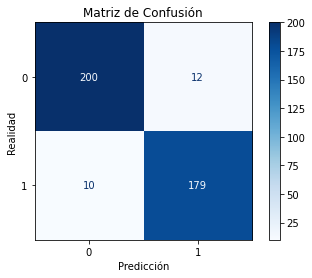

In [239]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

### Nusvm

### Caso 1

In [240]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [241]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [242]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'scale', 'kernel': 'linear', 'nu': 0.2}


In [243]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [244]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       212
           1       0.93      0.95      0.94       189

    accuracy                           0.94       401
   macro avg       0.94      0.94      0.94       401
weighted avg       0.94      0.94      0.94       401



Matriz de Confusión
[[198  14]
 [ 10 179]]


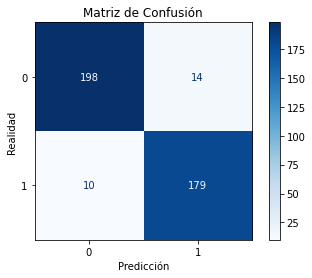

In [245]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

##SECCION CON DATOS SIN PREPROCESAR

## transformar texto(Embeding) Sin preprocesamiento de texto

In [271]:
df

,resultado,mensaje
0,0,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,FreeMsg Hey there darling it's been 3 week's n...
2,1,As per your request 'Melle Melle (Oru Minnamin...
3,0,WINNER!! As a valued network customer you have...
4,0,Had your mobile 11 months or more? U R entitle...
...,...,...
1285,0,Had your contract mobile 11 Mnths? Latest Moto...
1286,1,Yeh. Indians was nice. Tho it did kane me off ...
1287,0,REMINDER FROM O2: To get 2.50 pounds free call...
1288,0,This is the 2nd time we have tried 2 contact u...


In [246]:
# 4to paso: Vamos a crear dos variables que cargaran en memoria dos funciones para transformar el texto
##
##   - preprocessor: "objeto" que se encargará de transformar el texto en el formato que necesita el modelo BERT para funcionar
##   - encoder: "objeto" que será el modelo BERT y se alimentará del resultado de preprocessor, retornando el texto transformado en un vector numérico.

preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/4")

In [247]:
# 5to paso: Vamos a usar el objeto preprocessor, y guardamos su resultado en la variable embedding
##   A modo de ejemplo para su revisión, solo vamos a transformar dos textos:

embedding = preprocessor(df['mensaje']) # df['mensaje'] es el texto

In [248]:
# 6to paso: Vamos a codificar el texto con el modelo BERT:
##   - Fijarse que el objeto encoder recibe como argumento la variable embedding (resultado de preprocessor)
##   - Copiar el siguiente código de forma literal

pooled_output = encoder(embedding)["pooled_output"]

In [249]:
# Opcional: revisamos el contenido de la variable pooled_output, el cual tiene dos vectores de 128 dimensiones
##
##    - Dos vectores, porque le pasamos solo dos textos
##    - 128 dimensiones, porque el modelo BERT utilizado convierte cualquier texto (independiente del largo) en un vector numérico de 128 dimensiones.

pooled_output

<tf.Tensor: shape=(1290, 1024), dtype=float32, numpy=
array([[-0.9985208 , -0.9778116 ,  0.99997777, ..., -0.98706186,
         0.993665  , -0.97475094],
       [-0.9969714 , -0.9753213 ,  0.99988556, ..., -0.98628354,
         0.9764625 , -0.94500923],
       [-0.99930805, -0.99558157,  0.99999803, ..., -0.9995538 ,
         0.98647964, -0.9863099 ],
       ...,
       [-0.9901181 , -0.9637922 ,  0.99993044, ..., -0.9984252 ,
         0.94072944, -0.9772395 ],
       [-0.9993574 , -0.9955797 ,  0.99999934, ..., -0.99989915,
         0.99548984, -0.9960056 ],
       [ 0.75697905, -0.16161178,  0.9103952 , ..., -0.9734895 ,
         0.62785506, -0.81368935]], dtype=float32)>

In [250]:
# 7mo paso: El contenido de la variable pooled_output es una estructura de datos de tipo tensorflow.
#           Para transformarlo a un dataframe y usarlo de forma tradicional con los modelos clásicos, 
#           ejecutamos la siguiente linea de código:

dataX2 = pd.DataFrame(pooled_output.numpy())

In [251]:
# Opcional:  Ahora la variable dataX es un dataframe y podemos revisar su dimensionalidad y visualizarlo:
dataX2.shape

(1290, 1024)

In [252]:
dataX2

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.998521,-0.977812,0.999978,-0.964199,-0.998738,0.979337,-0.999133,0.998487,0.985282,-0.996852,...,-0.868732,-0.975271,-0.841749,0.996253,0.999977,-0.911934,0.997448,-0.987062,0.993665,-0.974751
1,-0.996971,-0.975321,0.999886,-0.915449,-0.997295,0.962834,-0.996114,0.995967,0.970371,-0.995907,...,-0.856894,-0.951130,-0.820438,0.994204,0.999829,-0.797655,0.995056,-0.986284,0.976462,-0.945009
2,-0.999308,-0.995582,0.999998,-0.979826,-0.999715,0.976332,-0.999566,0.999564,0.993017,-0.999586,...,-0.991583,-0.826302,-0.357718,0.997855,0.999999,-0.443400,0.998930,-0.999554,0.986480,-0.986310
3,-0.998409,-0.991969,1.000000,-0.998928,-0.999965,0.903449,-0.999979,0.999986,0.998539,-0.999765,...,-0.999690,-0.846565,0.106677,0.998042,1.000000,0.342706,0.999764,-0.999980,0.995692,-0.997616
4,-0.998452,-0.991349,0.999991,-0.983656,-0.999580,0.968054,-0.999399,0.999721,0.991862,-0.997789,...,-0.995037,-0.691443,-0.076455,0.997780,0.999997,0.103970,0.998682,-0.999661,0.987522,-0.985996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-0.999563,-0.994025,0.999999,-0.993369,-0.999691,0.976105,-0.999819,0.999822,0.995607,-0.999325,...,-0.993663,-0.850796,-0.295458,0.998775,0.999999,-0.215935,0.999308,-0.999671,0.995695,-0.989991
1286,-0.999792,-0.993090,0.999983,-0.979177,-0.997478,0.991689,-0.998985,0.995944,0.978601,-0.997642,...,-0.911522,-0.765597,-0.503963,0.998457,0.999998,-0.470298,0.998532,-0.998422,0.995331,-0.974166
1287,-0.990118,-0.963792,0.999930,-0.953986,-0.998873,0.835172,-0.998466,0.997828,0.974195,-0.996158,...,-0.982688,-0.885150,-0.611169,0.987516,0.999959,-0.532729,0.997086,-0.998425,0.940729,-0.977239
1288,-0.999357,-0.995580,0.999999,-0.996905,-0.999851,0.956323,-0.999960,0.999864,0.997002,-0.999643,...,-0.999327,-0.728010,0.297588,0.999346,1.000000,0.544703,0.999604,-0.999899,0.995490,-0.996006


##seleccion de las variable

In [253]:
X = dataX2 
Y = df['resultado'].copy()

In [254]:
X.columns

RangeIndex(start=0, stop=1024, step=1)

In [255]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 1024 entries, 0 to 1023
dtypes: float32(1024)
memory usage: 5.0 MB


In [256]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: resultado, dtype: int64

## Balanceo de datos

### Aplicando Smote

In [257]:
from imblearn.over_sampling import SMOTE #over sobre nivelar hacia arriba under nivelacion hacia el menor dato
#from imblearn.under_sampling import SMOTE 

smote = SMOTE(random_state = 325, n_jobs=-1)
X_smote, Y_smote = smote.fit_resample(X, Y)# hace Balance de los datos a partir de los agreglos

from collections import Counter

Counter(Y_smote)

Counter({0: 668, 1: 668})

## Train y test

In [258]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, random_state=325,test_size = 0.3)
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=325,test_size = 0.3)        

## SVM


###SVC 

#### Caso 1

In [259]:
parametros = {'C'      : np.arange(1, 5, 1),
            'gamma'  : np.arange(1, 5, 1),
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [260]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4]),
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [261]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [262]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [263]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       212
           1       0.96      0.94      0.95       189

    accuracy                           0.95       401
   macro avg       0.95      0.95      0.95       401
weighted avg       0.95      0.95      0.95       401



Matriz de Confusión
[[204   8]
 [ 12 177]]


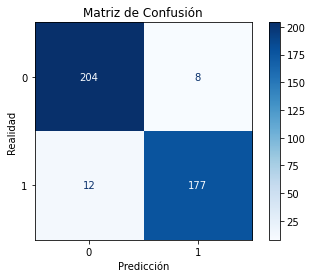

In [264]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()

### Nusvm

#### Caso 1

In [265]:
parametros = {'nu'      : np.arange(0, 1, 0.1),
            'gamma'  : ['scale','auto'],
           'kernel' : ['rbf', 'linear','sigmoid']}

from sklearn.svm import NuSVC
from sklearn.model_selection import GridSearchCV

clf = NuSVC(class_weight='balanced', random_state=325)  
grid_search = GridSearchCV(clf, parametros, n_jobs=-1, cv=5) 

In [266]:
grid_search.fit(X_train_smote, Y_train_smote)

GridSearchCV(cv=5, estimator=NuSVC(class_weight='balanced', random_state=325),
             n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [267]:
print('El mejor modelo:\n', grid_search.best_params_)

El mejor modelo:
 {'gamma': 'scale', 'kernel': 'linear', 'nu': 0.1}


In [268]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test_smote)

In [269]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       212
           1       0.96      0.94      0.95       189

    accuracy                           0.95       401
   macro avg       0.95      0.95      0.95       401
weighted avg       0.95      0.95      0.95       401



Matriz de Confusión
[[204   8]
 [ 12 177]]


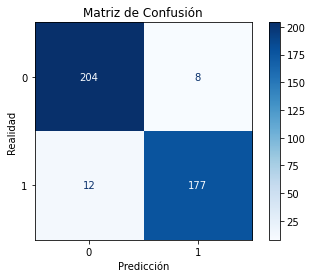

In [270]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
       clf_best,
       X_test_smote,
       Y_test_smote,
       display_labels=None,
       cmap=plt.cm.Blues,
       normalize=None)

disp.ax_.set_title('Matriz de Confusión')
disp.ax_.set_xlabel('Predicción');
disp.ax_.set_ylabel('Realidad'); 
disp.ax_.xaxis.set_ticklabels(['0', '1']); 
disp.ax_.yaxis.set_ticklabels(['0', '1']);

print('Matriz de Confusión')
print(disp.confusion_matrix)

plt.show()